In [5]:
!pip install opencv-python 

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)


In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [3]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [4]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 329 files belonging to 2 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
batch = data_iterator.next()

In [7]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [10]:
# train_size = int(len(data) * 0.7)
# val_size = int(len(data) * 0.2)
# test_size = int(len(data) * 0.1)
train_size = 8
val_size = 2
test_size = 1

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

##### Testes de tamanho do treino

In [93]:
model = Sequential()

In [94]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [95]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [96]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 30, 30, 16)     

In [9]:
logdir='logs'

In [10]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [130]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 16s 2s/step - loss: 0.8817 - accuracy: 0.5273 - val_loss: 0.6860 - val_accuracy: 0.5938
Epoch 2/20
8/8 [==============================] - 15s 2s/step - loss: 0.6886 - accuracy: 0.4727 - val_loss: 0.6636 - val_accuracy: 0.5156
Epoch 3/20
8/8 [==============================] - 16s 2s/step - loss: 0.6591 - accuracy: 0.5547 - val_loss: 0.6585 - val_accuracy: 0.4688
Epoch 4/20
8/8 [==============================] - 15s 2s/step - loss: 0.6346 - accuracy: 0.5273 - val_loss: 0.6085 - val_accuracy: 0.5938
Epoch 5/20
8/8 [==============================] - 14s 1s/step - loss: 0.5524 - accuracy: 0.7227 - val_loss: 0.4697 - val_accuracy: 0.8594
Epoch 6/20
8/8 [==============================] - 15s 2s/step - loss: 0.4838 - accuracy: 0.7695 - val_loss: 0.4727 - val_accuracy: 0.7500
Epoch 7/20
8/8 [==============================] - 15s 2s/step - loss: 0.3955 - accuracy: 0.8203 - val_loss: 0.2842 - val_accuracy: 0.9062
Epoch 8/20
8/8 [==================

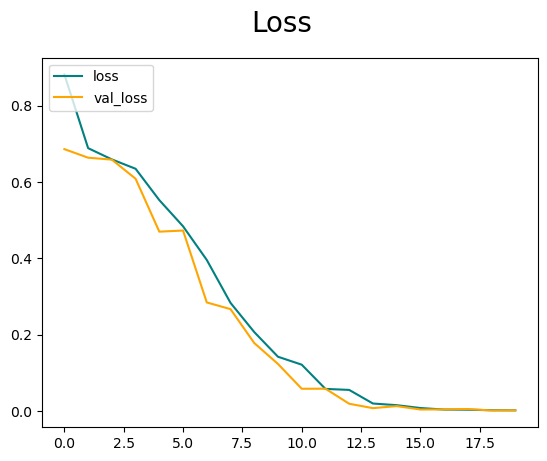

In [131]:
# modelo 1
# treino/validação/teste = 8/2/1
# épocas de treino: 20

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

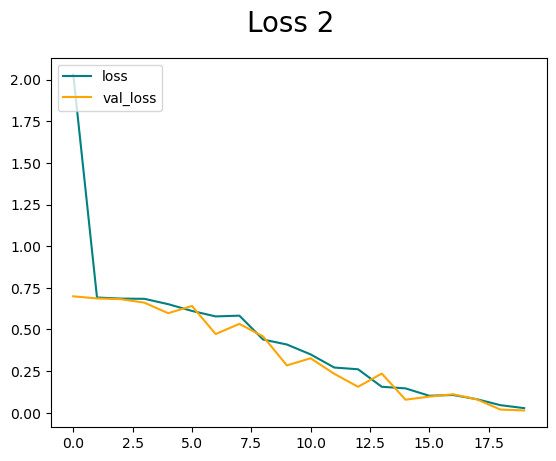

In [80]:
# modelo 2
# treino/validação/teste = 7/2/2
# épocas de treino: 20

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss 2', fontsize=20)
plt.legend(loc="upper left")
plt.show()

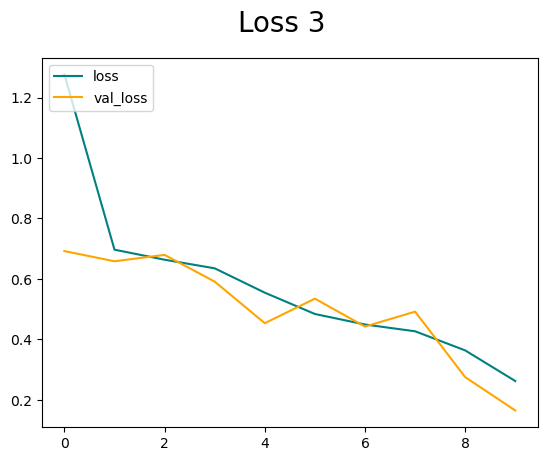

In [106]:
# modelo 3
# treino/validação/teste = 8/2/1
# épocas de treino: 10

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss 3', fontsize=20)
plt.legend(loc="upper left")
plt.show()

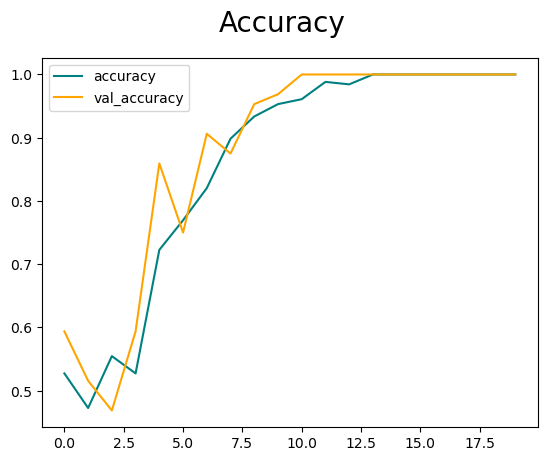

In [132]:
# modelo 1
# treino/validação/teste = 8/2/1
# épocas de treino: 20

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

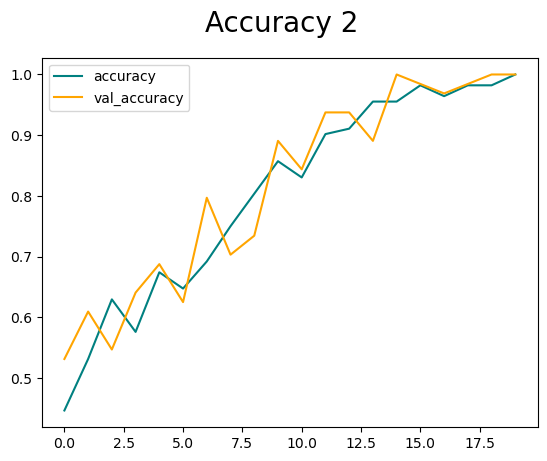

In [81]:
# modelo 2
# treino/validação/teste = 7/2/2
# épocas de treino: 20

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy 2', fontsize=20)
plt.legend(loc="upper left")
plt.show()

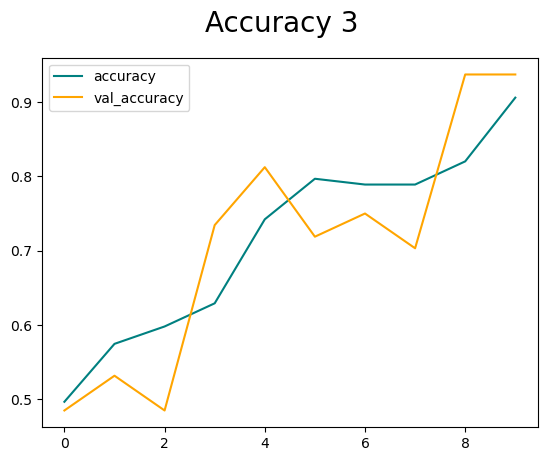

In [108]:
# modelo 3
# treino/validação/teste = 8/2/1
# épocas de treino: 10

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy 3', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [11]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [13]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [134]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 [==============================] - 0s 152ms/step


In [135]:
# outros modelos deu bom
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [110]:
#modelo 3
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9677419, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9830508, shape=(), dtype=float32)


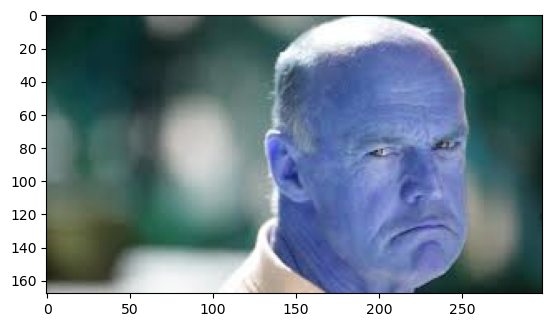

In [136]:
img = cv2.imread('testAngry.jfif')
plt.imshow(img)
plt.show()

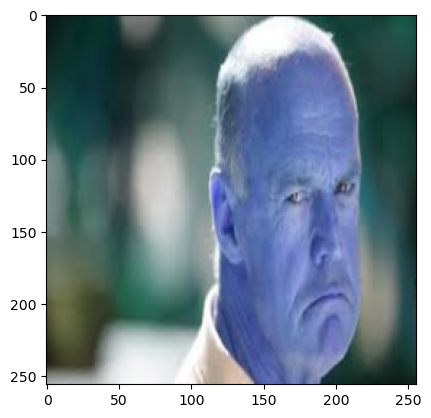

In [137]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [138]:
# teste 1 modelo 1
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 34ms/step


array([[0.16923456]], dtype=float32)

In [89]:
# teste 1 modelo 2
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 41ms/step


array([[0.30623814]], dtype=float32)

In [113]:
# teste 1 modelo 3
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 34ms/step


array([[0.7364191]], dtype=float32)

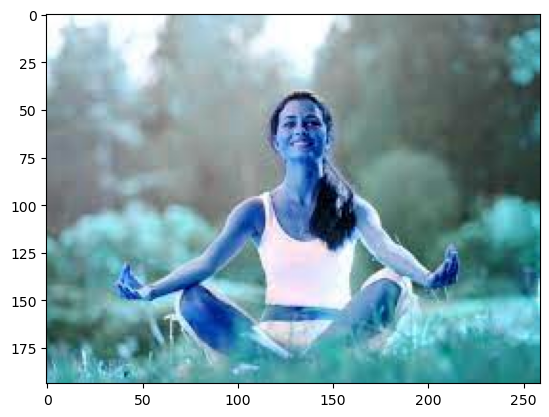

In [139]:
img = cv2.imread('testCalm.jfif')
plt.imshow(img)
plt.show()

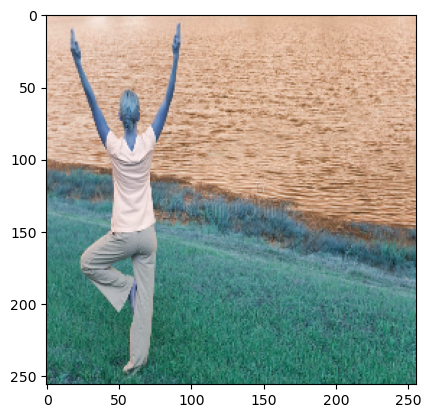

In [20]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [141]:
# teste 2 modelo 1
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 36ms/step


array([[0.99314785]], dtype=float32)

In [92]:
# teste 2 modelo 2
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 35ms/step


array([[0.8245367]], dtype=float32)

In [117]:
# teste 2 modelo 3
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 40ms/step


array([[0.7432223]], dtype=float32)

In [12]:
from tensorflow.keras.models import load_model


In [32]:
model.save(os.path.join('models','imageclassifier.h5'))

In [34]:
new_model = load_model('models/imageclassifier.h5')

In [35]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 87ms/step


array([[0.9986923]], dtype=float32)

##### Testes de Arquitetura

In [13]:
def plotMetrics(hist):
    for metric in hist.history:
        if(metric.startswith("val_")):
            continue
        
        val_label = "val_" + metric
        
        fig = plt.figure()
        plt.plot(hist.history[metric], color='teal', label=metric)
        plt.plot(hist.history[val_label], color='orange', label=val_label)
        fig.suptitle(metric, fontsize=20)
        plt.legend(loc="upper left")
        plt.show()

In [16]:
def simpleTest(model, image_path):
    img = cv2.imread(image_path)
    resize = tf.image.resize(img, (256,256))
    return model.predict(np.expand_dims(resize/255, 0))

In [17]:
def testModelProcess(model, test):
    pre = Precision()
    re = Recall()
    acc = BinaryAccuracy()
    
    for batch in test.as_numpy_iterator(): 
        X, y = batch
        yhat = model.predict(X)
        pre.update_state(y, yhat)
        re.update_state(y, yhat)
        acc.update_state(y, yhat)
    
    print(pre.result(), re.result(), acc.result())
    
    first_yhat = simpleTest(model, 'testAngry.jfif')
    print("Angry test value:")
    print(first_yhat)
  
    second_yhat = simpleTest(model, 'testCalm.jfif')
    print("Calm test value:")
    print(second_yhat)

In [18]:
def modelMeasurements(model, model_name="", train_size=8, val_size=2, test_size=1, num_epochs=20, has_callback=False): 
    train = data.take(train_size)
    val = data.skip(train_size).take(val_size)
    test = data.skip(train_size + val_size).take(test_size)
    chosen_callbacks = []
    
    if(has_callback):
        chosen_callbacks.append(tf.keras.callbacks.TensorBoard(log_dir='logs'))
    
    hist = model.fit(train, epochs=num_epochs, validation_data=val, callbacks=chosen_callbacks)
    
    plotMetrics(hist)
    # plotLoss(hist)
    # plotAccuracy(hist)
    
    testModelProcess(model, test)
    
    if(model_name != ""):
        model.save(os.path.join('models', model_name))

In [25]:
# os resultados dele já foram testados como modelo 1 nos testes de antes
primaryModel = Sequential([
    Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [26]:
primaryModel.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

Epoch 1/20
8/8 [==============================] - 17s 2s/step - loss: 1.2026 - accuracy: 0.5078 - val_loss: 0.6979 - val_accuracy: 0.4688
Epoch 2/20
8/8 [==============================] - 16s 2s/step - loss: 0.6890 - accuracy: 0.5625 - val_loss: 0.6797 - val_accuracy: 0.5156
Epoch 3/20
8/8 [==============================] - 15s 2s/step - loss: 0.6447 - accuracy: 0.6289 - val_loss: 0.7493 - val_accuracy: 0.4219
Epoch 4/20
8/8 [==============================] - 15s 2s/step - loss: 0.5683 - accuracy: 0.7031 - val_loss: 0.4567 - val_accuracy: 0.8125
Epoch 5/20
8/8 [==============================] - 15s 2s/step - loss: 0.4591 - accuracy: 0.7969 - val_loss: 0.3237 - val_accuracy: 0.9375
Epoch 6/20
8/8 [==============================] - 15s 2s/step - loss: 0.3638 - accuracy: 0.8516 - val_loss: 0.2888 - val_accuracy: 0.8906
Epoch 7/20
8/8 [==============================] - 15s 2s/step - loss: 0.2767 - accuracy: 0.8828 - val_loss: 0.2050 - val_accuracy: 0.9062
Epoch 8/20
8/8 [==================

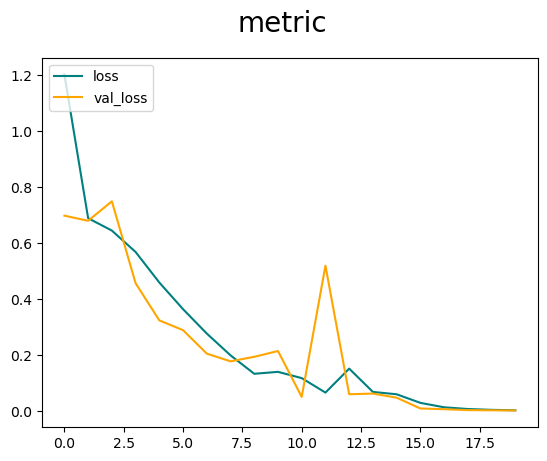

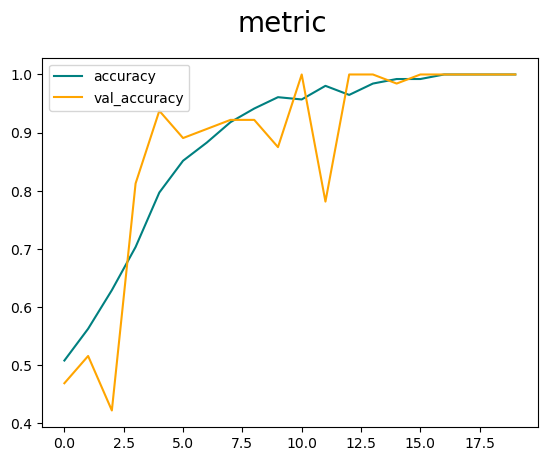

KeyError: 'val_val_loss'

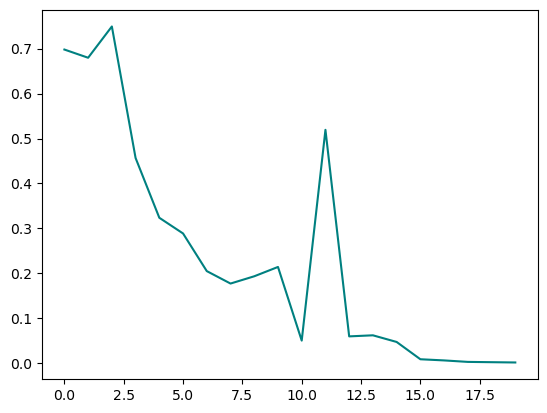

In [27]:
# primary_model.h5
modelMeasurements(primaryModel
                  # , model_name='primary_model.h5'
                 )

In [33]:
dropoutModel = Sequential([
    Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [101]:
dropoutModel.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 30, 30, 16)     

In [34]:
dropoutModel.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# mudancas para testar: 
# optmizer='rmsprop' | adam, 
# chosen_metrics=['accuracy', 'binary_accuracy'] | ['binary_accuracy']

Epoch 1/20
8/8 [==============================] - 16s 2s/step - loss: 1.1630 - accuracy: 0.4961 - val_loss: 0.6938 - val_accuracy: 0.4219
Epoch 2/20
8/8 [==============================] - 15s 2s/step - loss: 0.6749 - accuracy: 0.6211 - val_loss: 0.6379 - val_accuracy: 0.7656
Epoch 3/20
8/8 [==============================] - 15s 2s/step - loss: 0.6319 - accuracy: 0.6719 - val_loss: 0.5696 - val_accuracy: 0.7656
Epoch 4/20
8/8 [==============================] - 15s 2s/step - loss: 0.6233 - accuracy: 0.7188 - val_loss: 0.6812 - val_accuracy: 0.5781
Epoch 5/20
8/8 [==============================] - 15s 2s/step - loss: 0.5780 - accuracy: 0.7148 - val_loss: 0.5482 - val_accuracy: 0.7969
Epoch 6/20
8/8 [==============================] - 15s 2s/step - loss: 0.5030 - accuracy: 0.7656 - val_loss: 0.4548 - val_accuracy: 0.7656
Epoch 7/20
8/8 [==============================] - 15s 2s/step - loss: 0.3827 - accuracy: 0.8398 - val_loss: 0.3636 - val_accuracy: 0.8281
Epoch 8/20
8/8 [==================

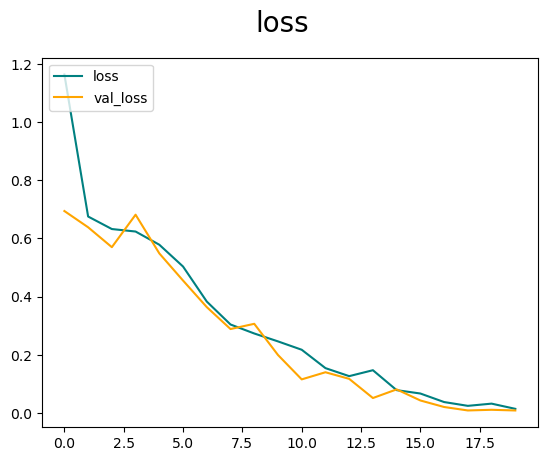

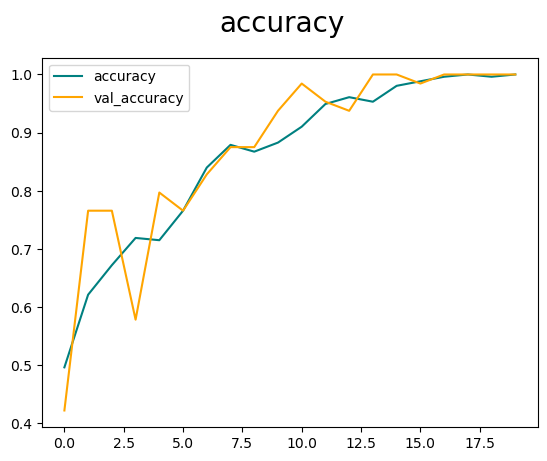

1/1 [==============================] - 0s 156ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
1/1 [==============================] - 0s 32ms/step
Angry test value:
[[0.8056442]]
1/1 [==============================] - 0s 33ms/step
Calm test value:
[[0.8851849]]


In [35]:
# dropout_model.h5
modelMeasurements(dropoutModel
                  # , model_name='dropout_model.h5'
                 )

In [142]:
biggerModel = Sequential([
    Conv2D(64, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [125]:
biggerModel.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 30, 30, 16)     

In [143]:
biggerModel.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# mudancas para testar: 
# num_epochs=15 | 10,  
# optmizer='rmsprop', 
# chosen_metrics=['accuracy', 'binary_accuracy'] | ['binary_accuracy']

Epoch 1/20
8/8 [==============================] - 30s 3s/step - loss: 0.8352 - accuracy: 0.4844 - val_loss: 0.7429 - val_accuracy: 0.4375
Epoch 2/20
8/8 [==============================] - 26s 3s/step - loss: 0.7041 - accuracy: 0.4805 - val_loss: 0.6865 - val_accuracy: 0.4844
Epoch 3/20
8/8 [==============================] - 25s 3s/step - loss: 0.6805 - accuracy: 0.5430 - val_loss: 0.6598 - val_accuracy: 0.5000
Epoch 4/20
8/8 [==============================] - 25s 3s/step - loss: 0.6351 - accuracy: 0.6523 - val_loss: 0.5631 - val_accuracy: 0.7812
Epoch 5/20
8/8 [==============================] - 26s 3s/step - loss: 0.6094 - accuracy: 0.6289 - val_loss: 0.5175 - val_accuracy: 0.7969
Epoch 6/20
8/8 [==============================] - 24s 3s/step - loss: 0.4945 - accuracy: 0.7812 - val_loss: 0.3722 - val_accuracy: 0.8438
Epoch 7/20
8/8 [==============================] - 25s 3s/step - loss: 0.3678 - accuracy: 0.8555 - val_loss: 0.3231 - val_accuracy: 0.8594
Epoch 8/20
8/8 [==================

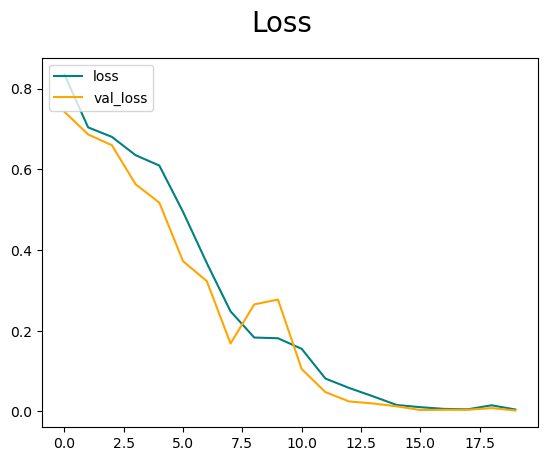

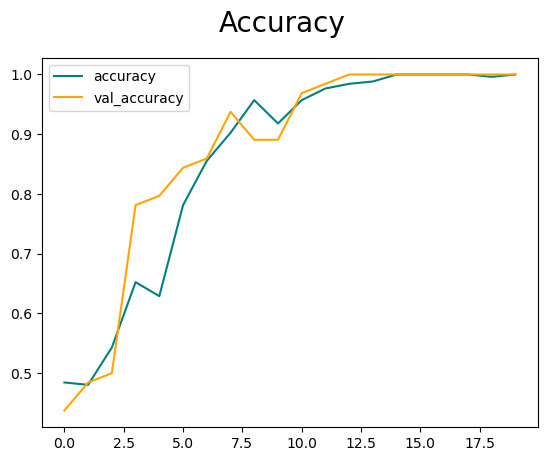

1/1 [==============================] - 0s 235ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
1/1 [==============================] - 0s 51ms/step
Angry test value:
[[0.05809217]]
1/1 [==============================] - 0s 57ms/step
Calm test value:
[[0.97377646]]


In [122]:
# biggerModel.h5
modelMeasurements(biggerModel, model_name='biggerModel.h5', num_epochs=25)

In [141]:
biggerModelWithDropout = Sequential([
    Conv2D(64, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

biggerModelWithDropout.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

esse resultado a baixo na vdd e do biggerModel.h5, pois na confecção dos dois modelos com e sem dropout eu inverti as coisas, mas os resultados dentro da pasta models estão corretos de acrodo com cada modelo, eles apenas estão de lugares trocados aqui na programação

Epoch 1/20
8/8 [==============================] - 25s 3s/step - loss: 0.7388 - accuracy: 0.5430 - val_loss: 0.7106 - val_accuracy: 0.5781
Epoch 2/20
8/8 [==============================] - 25s 3s/step - loss: 0.7197 - accuracy: 0.4961 - val_loss: 0.7076 - val_accuracy: 0.4219
Epoch 3/20
8/8 [==============================] - 24s 3s/step - loss: 0.6817 - accuracy: 0.5508 - val_loss: 0.6695 - val_accuracy: 0.5781
Epoch 4/20
8/8 [==============================] - 24s 3s/step - loss: 0.6396 - accuracy: 0.6758 - val_loss: 0.5870 - val_accuracy: 0.7656
Epoch 5/20
8/8 [==============================] - 24s 3s/step - loss: 0.6040 - accuracy: 0.6797 - val_loss: 0.5460 - val_accuracy: 0.7188
Epoch 6/20
8/8 [==============================] - 24s 3s/step - loss: 0.4902 - accuracy: 0.7969 - val_loss: 0.4883 - val_accuracy: 0.7344
Epoch 7/20
8/8 [==============================] - 25s 3s/step - loss: 0.3906 - accuracy: 0.7930 - val_loss: 0.4962 - val_accuracy: 0.7031
Epoch 8/20
8/8 [==================

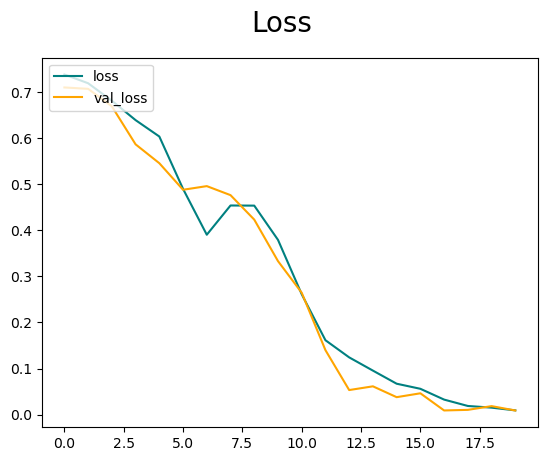

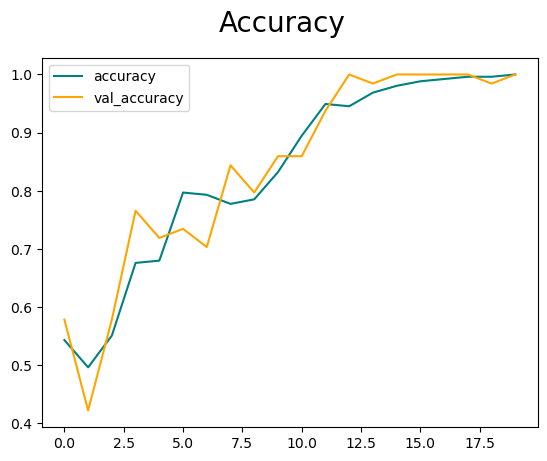

1/1 [==============================] - 0s 220ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
1/1 [==============================] - 0s 37ms/step
Angry test value:
[[0.39260885]]
1/1 [==============================] - 0s 36ms/step
Calm test value:
[[0.7296772]]


In [144]:
# biggerModelWithDropout.h5
modelMeasurements(biggerModelWithDropout, model_name="biggerModelWithDropout.h5")

In [145]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

como o biggerModelWithDropout foi melhor nos testes anteriores, esse modelo também terá(pelos menos agora no início né)

In [153]:
augmentedModel = Sequential([
    RandomFlip("horizontal", input_shape=(256,256,3)),
    RandomRotation(0.1),
    RandomZoom(0.1),
    Conv2D(64, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [154]:
augmentedModel.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 256, 256, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 conv2d_72 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 127, 127, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 125, 125, 32)    

In [155]:
augmentedModel.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# mudancas para testar: 
# num_epochs=15 | 10,  
# optmizer='rmsprop', 
# chosen_metrics=['accuracy', 'binary_accuracy'] | ['binary_accuracy']

Epoch 1/20


8/8 [==============================] - 31s 3s/step - loss: 0.8950 - accuracy: 0.4102 - val_loss: 0.6870 - val_accuracy: 0.5156
Epoch 2/20
8/8 [==============================] - 35s 4s/step - loss: 0.6869 - accuracy: 0.5000 - val_loss: 0.6830 - val_accuracy: 0.5156
Epoch 3/20
8/8 [==============================] - 35s 4s/step - loss: 0.6575 - accuracy: 0.5859 - val_loss: 0.7589 - val_accuracy: 0.5469
Epoch 4/20
8/8 [==============================] - 30s 3s/step - loss: 0.6666 - accuracy: 0.6055 - val_loss: 0.6464 - val_accuracy: 0.6875
Epoch 5/20
8/8 [==============================] - 30s 3s/step - loss: 0.6133 - accuracy: 0.6719 - val_loss: 0.9439 - val_accuracy: 0.4531
Epoch 6/20
8/8 [==============================] - 28s 3s/step - loss: 0.6061 - accuracy: 0.6875 - val_loss: 0.5732 - val_accuracy: 0.6875
Epoch 7/20
8/8 [==============================] - 28s 3s/step - loss: 0.5554 - accuracy: 0.6914 - val_loss: 0.5213 - val_accuracy: 0.7812
Epoch 8/20
8/8 [=============================

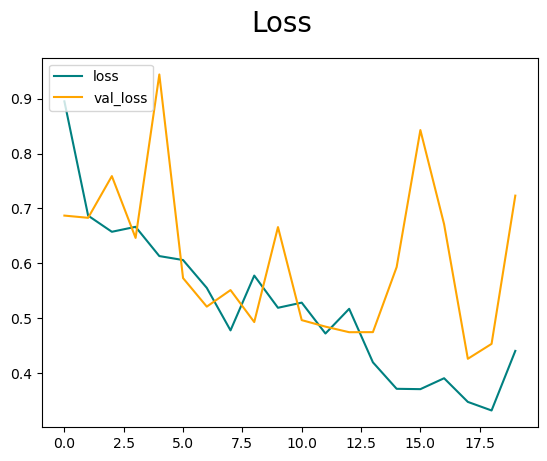

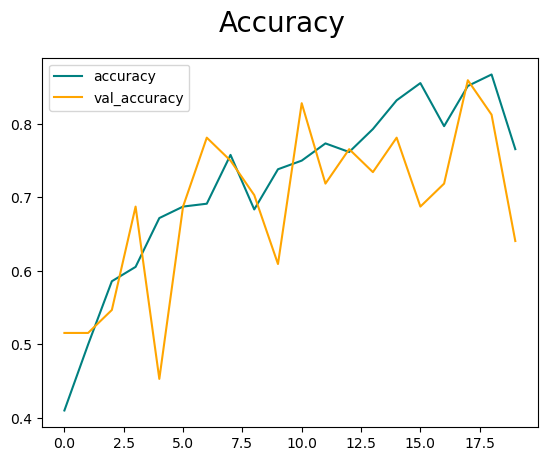

1/1 [==============================] - 0s 275ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.6666667, shape=(), dtype=float32) tf.Tensor(0.8888889, shape=(), dtype=float32)
1/1 [==============================] - 0s 41ms/step
Angry test value:
[[0.7367822]]
1/1 [==============================] - 0s 39ms/step
Calm test value:
[[0.4754128]]


In [156]:
# augmentedModel.h5
modelMeasurements(augmentedModel, model_name="augmentedModel.h5")

In [21]:
augmentedModelWithDropoutSaved = load_model('models/augmentedModelWithDropout')
augmentedModelWithDropoutSaved.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 260ms/step


array([[0.81260955]], dtype=float32)